# PW6 Strom und Spannungsquellen


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp


pd.set_option('display.float_format', '{:.2f}'.format)

## Solarzellen als Gleichstromquelle

### Grundlage 
Eine Solarzelle hat einen Internen Verlust. Dieser funktioniert ähnlich, wie ein Halbleiter. Dabei gibt es einnen Lastwiiderstand bei dem die höchste Leistung abgeruffen wird.

### Aufbau und Durchführung

Wir haben eine Solarzelle, welche von einer Lampe mit variablen Abstand betrieben wird, als Quelle und einen Variablen Lastwiderstand, sowie einen Invarianten Widerstand in reihe geschaltet. Am Invarianten Widerstand wird die Spannung gemessen, sodass wir die Stromstärke berechnen können. Im Folgenden wird die Spannung gegen die Stärke aufgetragen und der Punkt der maximalen Leistung, sowie der Kurvenfüllfaktor, ermittelt.

### Unsicherheiten und Messgeräte

Uni-T-UT61B:
Spannungsmessung:  - 4V 



### Ergebnisse

[[2.12461764 2.12461764 2.13132079 2.13831391 2.15324621 2.1875279
  2.22924437 2.31176275 2.38649858 2.45800656 2.82249344 3.13561704
  3.68326882 4.13720549]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.085400,1.970960,0.005400,1.355556,0.011043,0.000943
1,0.423000,1.036407,0.005400,1.355556,0.011043,0.004671
2,0.779000,0.928370,0.005300,1.366038,0.010838,0.008443
3,1.440000,0.869444,0.005200,1.376923,0.010634,0.015313
4,1.788000,0.855928,0.005000,1.400000,0.010225,0.018282
5,2.058000,0.848591,0.004600,1.452174,0.009407,0.019360
6,2.202000,0.845413,0.004200,1.514286,0.008589,0.018913
7,2.408000,0.841528,0.003600,1.633333,0.007362,0.017728
8,2.501000,0.839984,0.003200,1.737500,0.006544,0.016366
9,2.564000,0.839002,0.002900,1.834483,0.005930,0.015206


$$U_{LL} = 2.94+/-0.02\,\text{mV}$$

$$ I_{KS} = 0.0111+/-0.0004\,\text{A}$$

$$ P_{max} = 0.019+/-0.001\,\text{W}$$

$$ R_{L,max} = 219+/-9\,\Omega$$

$$ C_{FF} = 0.59+/-0.04$$

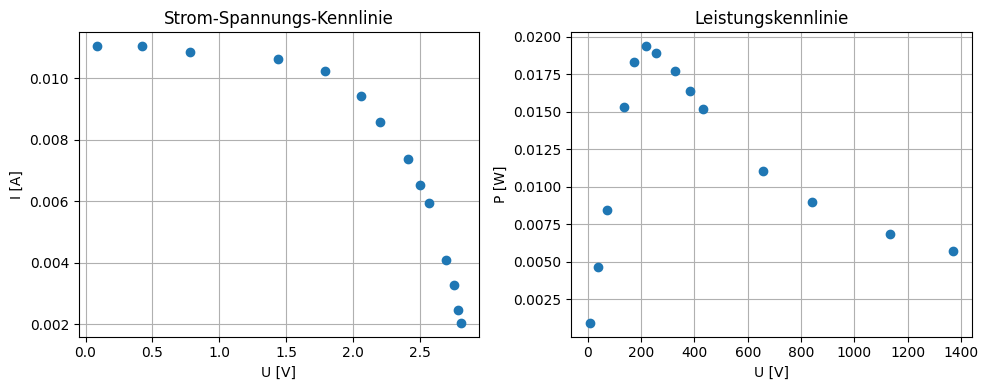

In [142]:
#intensität 15 cm


U = np.array([85.4, 423, 779, 1440, 1788, 2058, 2202, 2408, 2501, 2564, 2695, 2752, 2784, 2803]) /1000         #mv
# +-*0.08 + 1
U_rel = ((U*0.008+0.001)/U)*100



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000


U_I = np.array([5.4, 5.4, 5.3, 5.2, 5, 4.6, 4.2, 3.6, 3.2, 2.9, 2, 1.6, 1.2, 1])/1000    #mv
U_Irel = ((U_I*0.008+0.00003)/U_I)*100

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000
# +- *0.08 + 0.03

uR_I = ufloat(0.489,0.008) #5%
Urel = 489/8

R_I = 0.489 #ohm




I = U_I / R_I #mA
I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100
print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)],I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):],U[int(2*len(U)/3):])

I_KS = ufloat(I_d,I_d*0.04)
U_LL = ufloat(U_d,U_d*0.008+0.001)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max],U[idx_max]*0.01)
I_opt = ufloat(I[idx_max],I[idx_max]*0.04)
P_max = ufloat(P[idx_max],P[idx_max]*0.05)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{mV}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel('U [V]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

[[1.93177599 1.93177599 1.93269913 1.93363762 1.93654902 1.94862695
  1.96655086 1.98608687 2.01984723 2.05353068 2.32864589 2.62277891
  2.95988407 3.36702798 4.13720549]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.207700,1.281464,0.013200,1.027273,0.026994,0.005607
1,0.717000,0.939470,0.013200,1.027273,0.026994,0.019355
2,1.326000,0.875415,0.013100,1.029008,0.026789,0.035523
3,1.867000,0.853562,0.013000,1.030769,0.026585,0.049634
4,2.405000,0.841580,0.012700,1.036220,0.025971,0.062461
5,2.704000,0.836982,0.011600,1.058621,0.023722,0.064144
6,2.853000,0.835051,0.010300,1.091262,0.021063,0.060094
7,2.930000,0.834130,0.009200,1.126087,0.018814,0.055125
8,3.001000,0.833322,0.007800,1.184615,0.015951,0.047869
9,3.057000,0.832712,0.006800,1.241176,0.013906,0.042510


$$U_{LL} = 3.21+/-0.03\,\text{mV}$$

$$ I_{KS} = 0.027+/-0.001\,\text{A}$$

$$ P_{max} = 0.064+/-0.003\,\text{W}$$

$$ R_{L,max} = 114+/-5\,\Omega$$

$$ C_{FF} = 0.73+/-0.05$$

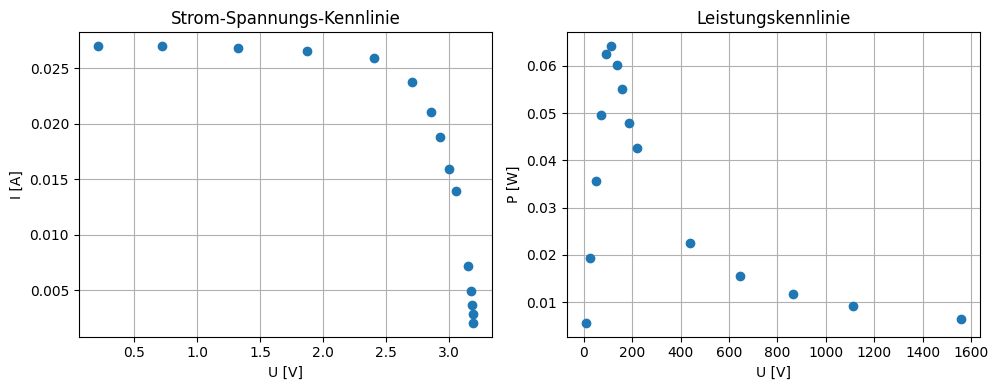

In [143]:
#intensität 7.5 cm


U = np.array([207.7, 717, 1326, 1867, 2405, 2704, 2853, 2930, 3001,         3057, 3149, 3174, 3184, 3190, 3189]) /1000         #mv
U_I = np.array([13.2, 13.2, 13.1, 13, 12.7, 11.6, 10.3, 9.2, 7.8,   6.8, 3.5, 2.4, 1.8, 1.4, 1]) /1000    #mv
R_I = ufloat(0.489,8) 
R_I = 0.489 #ohm
# +-*0.08 + 1
U_rel = ((U*0.008+0.001)/U)*100



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000
U_Irel = ((U_I*0.008+0.00003)/U_I)*100

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000
# +- *0.08 + 0.03

uR_I = ufloat(0.489,0.008) #5%
Urel = 489/8

R_I = 0.489 #ohm




I = U_I / R_I #mA
I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100
print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)],I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):],U[int(2*len(U)/3):])

I_KS = ufloat(I_d,I_d*0.04)
U_LL = ufloat(U_d,U_d*0.008+0.001)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max],U[idx_max]*0.01)
I_opt = ufloat(I[idx_max],I[idx_max]*0.04)
P_max = ufloat(P[idx_max],P[idx_max]*0.05)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{mV}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel('U [V]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

## Reale Spannungsquelle

#### Aufbau und Durchführung

Um den Innenwiderstand einer Baterie zu messen, wird ein variabler Widerstand in reihe Geschaltet. Daudurch kann die Stromstärke im Kreis reguliert werden. dabei werden die Klemmspannung und die Klemmstärke des Stromkreises gemessen.

### Unsicherheiten und Messgeräte

UNI-T-UT61B: 
Spannung:
4V messebereich 0.001 auflösung (0.5% + 1 Digit)

Strom:
40mA-400mA messbereich 0.1 Auflösung (1.2% + 3 Digits)

### Ergebnisse

,I [A],U_KL [V]
0,0.007750,1.570000
1,0.008160,1.569000
2,0.008600,1.569000
3,0.009100,1.569000
4,0.009660,1.569000
5,0.015310,1.567000
6,0.017030,1.565000
7,0.019110,1.565000
8,0.021750,1.564000
9,0.025250,1.563000


$$U_{0,gemessen} = 1.573+/-0.080\,\text{V}$$

$$U_0 = 1.571+/-0.047\,\text{V}$$

$$R_i = 0.322+/-0.019\,\Omega$$

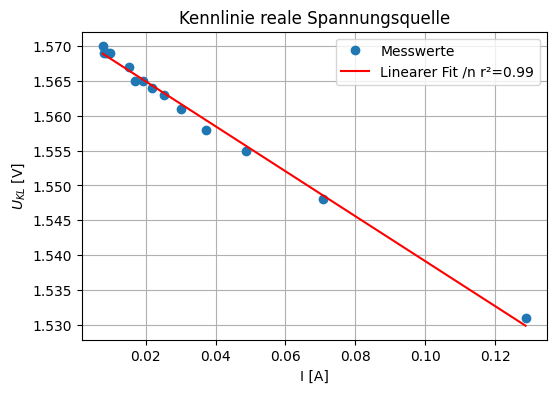

In [150]:
I = np.array([7.75, 8.16, 8.6, 9.1, 9.66, 15.31, 17.03, 19.11, 21.75, 25.25, 30.1, 37.22, 48.7, 70.7, 128.7]) /1000  # [A]
U_KL = np.array([1.57, 1.569, 1.569, 1.569, 1.569, 1.567, 1.565, 1.565, 1.564, 1.563, 1.561, 1.558, 1.555, 1.548, 1.531])      # [V]

uI = unp.uarray(I, I*0.012+0.0003) #2%
uU_KL = unp.uarray(U_KL, U_KL*0.005+0.001) #0.5%

#slope, intercept, r, p, stderr 
res = linregress(I, U_KL)
R_i = -ufloat(res.slope, res.stderr)
R_i = -ufloat(res.slope, -res.slope*0.06)
U_0 = ufloat(res.intercept,res.intercept_stderr)
U_0 = ufloat(res.intercept,res.intercept*0.03)
U_0m = ufloat(1.573, 1.573*0.05+0.001) #V

# 1.5 Volt batterie

data = {'I [A]': I, 'U_KL [V]': U_KL}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte der realen Spannungsquelle"))

display(Markdown(f"$$U_{{0,gemessen}} = {U_0m:.3f}\\,\\text{{V}}$$"))
display(Markdown(f"$$U_0 = {U_0:.3f}\\,\\text{{V}}$$"))
display(Markdown(f"$$R_i = {R_i:.3f}\\,\\Omega$$"))


plt.figure(figsize=(6,4))
plt.plot(I, U_KL, 'o', label='Messwerte')
plt.plot(I, res.slope*I + res.intercept, 'r-', label=rf"Linearer Fit /n r²={res.rvalue**2:.2f}")
plt.xlabel('I [A]')
plt.ylabel('$U_{{KL}}$ [V]')
plt.title('Kennlinie reale Spannungsquelle')
plt.grid(True)
plt.legend()
plt.show()
